In [150]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt
import scipy as sip

""" from sympy.physics.mechanics import dynamicsymbols, init_vprinting
init_vprinting """


' from sympy.physics.mechanics import dynamicsymbols, init_vprinting\ninit_vprinting '

In [151]:
# declare variables
t, l1, l2, m1, m2, w, a, g = smp.symbols(r't l_1 l_2 m_1 m_2 \omega A g')
x1, y1, theta1, x2, y2, theta2 =smp.symbols(r'x_1 y_1 \theta_1 x_2 y_2 \theta_2', cls=smp.Function)
x1, y1, theta1, x2, y2, theta2 = x1(t), y1(t), theta1(t), x2(t), y2(t), theta2(t)

# variable conversions
""" x1 = a*smp.cos(w*t)+l1*smp.sin(theta1)
y1 = - l1*smp.cos(theta1)
 """
x1_eq = smp.Eq(x1, a*smp.cos(w*t)+l1*smp.sin(theta1))
y1_eq = smp.Eq(y1, - l1*smp.cos(theta1))

x2_eq = smp.Eq(x2, x1 + l2*smp.sin(theta2))
y2_eq = smp.Eq(y2, y1 - l2*smp.cos(theta2))

x2_eq = x2_eq.subs(x1, x1_eq.rhs)
y2_eq = y2_eq.subs(y1, y1_eq.rhs)

# derivatives
theta1_dot = theta1.diff(t)
theta2_dot = theta2.diff(t)

theta1_ddot = theta1_dot.diff(t)
theta2_ddot = theta2_dot.diff(t)

x1_dot_eq = smp.Eq(x1.diff(t), x1_eq.rhs.diff(t))
y1_dot_eq = smp.Eq(y1.diff(t), y1_eq.rhs.diff(t))
x2_dot_eq = smp.Eq(x2.diff(t), x2_eq.rhs.diff(t))
y2_dot_eq = smp.Eq(y2.diff(t), y2_eq.rhs.diff(t))

# calculate the lagrangian
Kin = smp.symbols('K', cls=smp.Function)
Kin = Kin(t)
Kin_eq = smp.Eq(Kin,.5*m1*(x1_dot_eq.lhs**2+y1_dot_eq.lhs**2)+.5*m2*(x2_dot_eq.lhs**2+y2_dot_eq.lhs**2))
Kin_eq_subs = Kin_eq.subs([(x1,x1_eq.rhs), (x2,x2_eq.rhs),(y1,y1_eq.rhs), (y2,y2_eq.rhs)]).expand().simplify()

Pot = smp.symbols('P', cls=smp.Function)
Pot = Pot(t)
Pot_eq = smp.Eq(Pot,m1*g*y1+m2*g*y2)
Pot_eq_subs = Pot_eq.subs([(x1,x1_eq.rhs), (x2,x2_eq.rhs),(y1,y1_eq.rhs), (y2,y2_eq.rhs)]).expand().simplify()

Lagrange = smp.symbols(r'\mathcal{L}', cls=smp.Function)
Lagrange = Lagrange(t, theta1, theta2, theta1_dot, theta2_dot) #(t,x1, y1, theta1, x2, y2, theta2, x1_dot_eq.lhs, y1_dot_eq.lhs, theta1_dot, x2_dot_eq.lhs, y2_dot_eq.lhs, theta2_dot)
Lagrange_eq = smp.Eq(Lagrange, Kin - Pot)
Lagrange_eq_subs = Lagrange_eq.subs([(Kin, Kin_eq_subs.rhs), (Pot, Pot_eq_subs.rhs)]).expand().simplify()


In [152]:
# solve Lagrange 
L1 = smp.diff(Lagrange_eq_subs.rhs, theta1) - smp.diff(smp.diff(Lagrange_eq_subs.rhs, theta1_dot), t)
L1 = L1.expand().simplify()
L1_eq = smp.Eq(L1,0)

L2 = smp.diff(Lagrange_eq_subs.rhs, theta2) - smp.diff(smp.diff(Lagrange_eq_subs.rhs, theta2_dot), t)
L2 = L2.expand().simplify()
L2_eq = smp.Eq(L2,0)

solutions = smp.solve([L1, L2], (theta1_ddot, theta2_ddot), simplify=True, rational=False)
solution_theta1_ddot, solution_theta2_ddot = solutions[theta1_ddot], solutions[theta2_ddot]
solution_theta1_ddot, solution_theta2_ddot


((A*\omega**2*m_1*cos(\omega*t - \theta_1(t))/2 + A*\omega**2*m_1*cos(\omega*t + \theta_1(t))/2 + A*\omega**2*m_2*cos(\omega*t - \theta_1(t))/4 + A*\omega**2*m_2*cos(\omega*t + \theta_1(t))/4 - A*\omega**2*m_2*cos(\omega*t - \theta_1(t) + 2*\theta_2(t))/4 - A*\omega**2*m_2*cos(\omega*t + \theta_1(t) - 2*\theta_2(t))/4 - g*m_1*sin(\theta_1(t)) - g*m_2*sin(\theta_1(t) - 2*\theta_2(t))/2 - g*m_2*sin(\theta_1(t))/2 - l_1*m_2*sin(2*\theta_1(t) - 2*\theta_2(t))*Derivative(\theta_1(t), t)**2/2 - l_2*m_2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2)/(l_1*(m_1 - m_2*cos(\theta_1(t) - \theta_2(t))**2 + m_2)),
 (-A*\omega**2*m_1*cos(\omega*t)*cos(\theta_1(t) - \theta_2(t))*cos(\theta_1(t)) + A*\omega**2*m_1*cos(\omega*t)*cos(\theta_2(t)) - A*\omega**2*m_2*cos(\omega*t)*cos(\theta_1(t) - \theta_2(t))*cos(\theta_1(t)) + A*\omega**2*m_2*cos(\omega*t)*cos(\theta_2(t)) + g*m_1*sin(\theta_1(t))*cos(\theta_1(t) - \theta_2(t)) - g*m_1*sin(\theta_2(t)) + g*m_2*sin(\theta_1(t))*cos(\theta_1

In [153]:
# small angle approximation A_1 A_2 are small
# assume solutions in form amp1 * factor * cos (omega t)
amp1, factor = smp.symbols(r'A_1 \rho')
sub_list=[
    (smp.cos(theta1),1),
    (smp.cos(theta2),1),
    (smp.sin(theta1),theta1),
    (smp.sin(theta2),theta2),
    (theta1, amp1*smp.cos(w*t)),
    (theta2, amp1*factor*smp.cos(w*t))
]
# expand all trig function then do substitutions to avoid confusing the algorithm
L1_small_angles = smp.expand_trig(L1).subs(sub_list).doit().expand()
L2_small_angles = smp.expand_trig(L2).subs(sub_list).doit().expand()
eq1 = L1_small_angles.series(amp1,0,2).removeO().simplify()
eq2 = L2_small_angles.series(amp1,0,2).removeO().simplify()
solutions_small_angles = smp.solve([eq1.args[2], eq2.args[3]], (w, factor))


In [154]:

""" 
solutions_small_angles[0][0].subs([(m1,1), (m2,1), (l2,1), (l1,1), (a,1)])
smp.Limit(solutions_small_angles[1][0].subs([(m1,1), (m2,1), (l2,1), (l1,1), (a,1)]), amp1, 0.01).doit() """

eq1.args[2]
eq2.args[3]

smp.solve([eq1.args[2], eq2.args[3]], (w, factor))[:][0]


(-sqrt(-A_1*g*(-m_1 + m_2*(-sqrt((m_1 + m_2)*(A**2*m_1 + A**2*m_2 + 2*A*A_1*l_1*m_1 + 2*A*A_1*l_1*m_2 - 2*A*A_1*l_2*m_1 + 2*A*A_1*l_2*m_2 + A_1**2*l_1**2*m_1 + A_1**2*l_1**2*m_2 - 2*A_1**2*l_1*l_2*m_1 + 2*A_1**2*l_1*l_2*m_2 + A_1**2*l_2**2*m_1 + A_1**2*l_2**2*m_2))/(2*A_1*l_2*m_2) - (m_1 + m_2)*(A + A_1*l_1 - A_1*l_2)/(2*A_1*l_2*m_2)) - m_2)/(m_1*(A + A_1*l_1))),
 -sqrt((m_1 + m_2)*(A**2*m_1 + A**2*m_2 + 2*A*A_1*l_1*m_1 + 2*A*A_1*l_1*m_2 - 2*A*A_1*l_2*m_1 + 2*A*A_1*l_2*m_2 + A_1**2*l_1**2*m_1 + A_1**2*l_1**2*m_2 - 2*A_1**2*l_1*l_2*m_1 + 2*A_1**2*l_1*l_2*m_2 + A_1**2*l_2**2*m_1 + A_1**2*l_2**2*m_2))/(2*A_1*l_2*m_2) - (m_1 + m_2)*(A + A_1*l_1 - A_1*l_2)/(2*A_1*l_2*m_2))

In [155]:
m=smp.symbols("m")
solution_theta1_ddot.subs([(m1,1),(m2,m), (a, 1)])

(\omega**2*m*cos(\omega*t - \theta_1(t))/4 + \omega**2*m*cos(\omega*t + \theta_1(t))/4 - \omega**2*m*cos(\omega*t - \theta_1(t) + 2*\theta_2(t))/4 - \omega**2*m*cos(\omega*t + \theta_1(t) - 2*\theta_2(t))/4 + \omega**2*cos(\omega*t - \theta_1(t))/2 + \omega**2*cos(\omega*t + \theta_1(t))/2 - g*m*sin(\theta_1(t) - 2*\theta_2(t))/2 - g*m*sin(\theta_1(t))/2 - g*sin(\theta_1(t)) - l_1*m*sin(2*\theta_1(t) - 2*\theta_2(t))*Derivative(\theta_1(t), t)**2/2 - l_2*m*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2)/(l_1*(-m*cos(\theta_1(t) - \theta_2(t))**2 + m + 1))

In [156]:
solution_theta2_ddot.subs([(m1,1),(m2,m), (a, 1)])

(-\omega**2*m*cos(\omega*t)*cos(\theta_1(t) - \theta_2(t))*cos(\theta_1(t)) + \omega**2*m*cos(\omega*t)*cos(\theta_2(t)) - \omega**2*cos(\omega*t)*cos(\theta_1(t) - \theta_2(t))*cos(\theta_1(t)) + \omega**2*cos(\omega*t)*cos(\theta_2(t)) + g*m*sin(\theta_1(t))*cos(\theta_1(t) - \theta_2(t)) - g*m*sin(\theta_2(t)) + g*sin(\theta_1(t))*cos(\theta_1(t) - \theta_2(t)) - g*sin(\theta_2(t)) + l_1*m*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2 + l_1*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2 + l_2*m*sin(2*\theta_1(t) - 2*\theta_2(t))*Derivative(\theta_2(t), t)**2/2)/(l_2*(-m*cos(\theta_1(t) - \theta_2(t))**2 + m + 1))

Text(0.5, 0.01, 'Time')

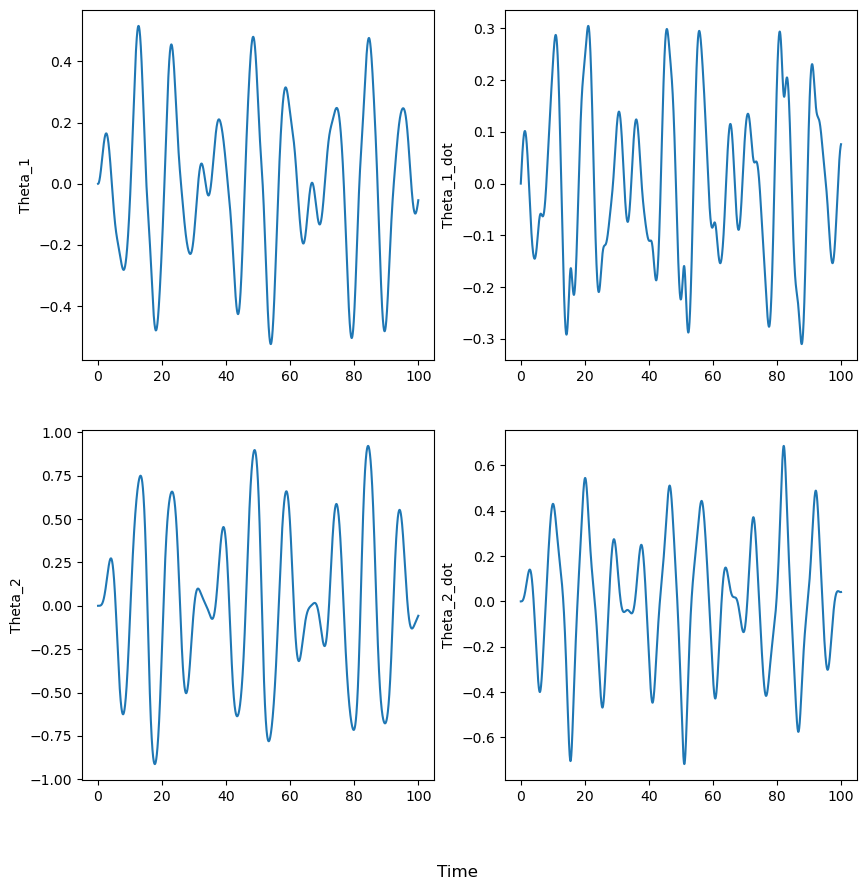

In [157]:
# numerical solutions: for a second order diff we need to add an auxilary function to make the system linear of first order in matrix form
# the auxiliary function is name z1 and z2

# system configuration
tt = np.linspace(0, 100, 10000)
aa = 5
gg = 10
m1m1 = 1
m2m2 = 1
l1l1 = 20
l2l2 = 20
ww = np.sqrt(gg/l1l1)

dz1dt_f = smp.lambdify((t,g,a,w,l1,l2,m1,m2,theta1,theta2,theta1_dot,theta2_dot), solution_theta1_ddot)
dthe1dt_f = smp.lambdify(theta1_dot, theta1_dot)

dz2dt_f = smp.lambdify((t,g,a,w,l1,l2,m1,m2,theta1,theta2,theta1_dot,theta2_dot), solution_theta2_ddot)
dthe2dt_f = smp.lambdify(theta2_dot, theta2_dot)

def dSdt(S, tt):
    the1, z1, the2, z2 = S
    return( [
        dthe1dt_f(z1),
        dz1dt_f(tt,gg,aa,ww,l1l1,l2l2,m1m1,m2m2, the1, the2, z1, z2),
        dthe2dt_f(z2),
        dz2dt_f(tt,gg,aa,ww,l1l1,l2l2,m1m1,m2m2, the1, the2, z1, z2),
    ])

ans = sip.integrate.odeint(dSdt, y0=[0, 0, 0, 0], t=tt)

theta_1_num_sol = ans[:,0]
theta_1dot_num_sol = ans[:,1]
theta_2_num_sol = ans[:,2]
theta_2dot_num_sol = ans[:,3]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
ax[0][0].plot(tt, theta_1_num_sol)
ax[0][0].set_ylabel("Theta_1")
ax[0][1].plot(tt, theta_1dot_num_sol)
ax[0][1].set_ylabel("Theta_1_dot")
ax[1][0].plot(tt, theta_2_num_sol)
ax[1][0].set_ylabel("Theta_2")
ax[1][1].plot(tt, theta_2dot_num_sol)
ax[1][1].set_ylabel("Theta_2_dot")

fig.supxlabel('Time')


In [158]:
# revisit small angle solution when amp -> 0

# system configuration
tt = np.linspace(0, 1000, 200000) # resolution needs to be high otherwie the results are not going to be consistant
aa = 0.1
gg = 9.81
m1m1 = 10
m2m2 = 10
l1l1 = 2000
l2l2 = 2000
approximation_aux= smp.symbols(r'\tau')

solutions_small_angles[1][0].subs([(m1,m1m1), (m2,m2m2), (l2,l1), (a, aa), (g,gg), (amp1, approximation_aux/l1)])


0.313209195267317*sqrt(10)*sqrt(-\tau*(-20 - 10*sqrt(2)*sqrt(\tau**2 + 0.1*\tau + 0.005)/\tau - 1.0/\tau)/(l_1*(\tau + 0.1)))

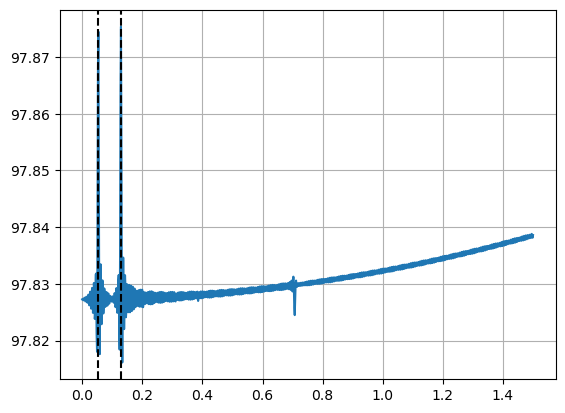

In [159]:
# Find resonance frequencies

vx1_num = smp.lambdify((t,g,a,w,l1,l2,m1,m2,theta1,theta2,theta1_dot,theta2_dot), smp.diff(x1_eq.rhs, t))
vx2_num = smp.lambdify((t,g,a,w,l1,l2,m1,m2,theta1,theta2,theta1_dot,theta2_dot), smp.diff(x2_eq.rhs, t))
vy1_num = smp.lambdify((t,g,a,w,l1,l2,m1,m2,theta1,theta2,theta1_dot,theta2_dot), smp.diff(y1_eq.rhs, t))
vy2_num = smp.lambdify((t,g,a,w,l1,l2,m1,m2,theta1,theta2,theta1_dot,theta2_dot), smp.diff(y2_eq.rhs, t))

def get_energy(ww):
    ans = sip.integrate.odeint(dSdt, y0=[0.1, 0, 0, 0], t=tt)
    vx1 = vx1_num(tt,gg,aa,ww,l1l1,l2l2,m1m1,m2m2,ans.T[0],ans.T[2],ans.T[1],ans.T[3])
    vx2 = vx2_num(tt,gg,aa,ww,l1l1,l2l2,m1m1,m2m2,ans.T[0],ans.T[2],ans.T[1],ans.T[3])
    vy1 = vy1_num(tt,gg,aa,ww,l1l1,l2l2,m1m1,m2m2,ans.T[0],ans.T[2],ans.T[1],ans.T[3])
    vy2 = vy2_num(tt,gg,aa,ww,l1l1,l2l2,m1m1,m2m2,ans.T[0],ans.T[2],ans.T[1],ans.T[3])
    E = 1/2 * np.mean(vx1**2+vx2**2+vy1**2+vy2**2)
    return E

ws = np.linspace(0, 1.5, 1000)
Es = np.vectorize(get_energy)(ws)

# be careful of substitutions 
# always simplify with no values then substitute with values
approximation_aux= smp.symbols(r'\tau')

plt.plot(ws, Es)
plt.axvline(smp.Limit(solutions_small_angles[1][0].subs([(m1,m1m1), (m2,m2m2), (l2,l1), (a, aa), (g,gg), (amp1, approximation_aux/l1), (l1,l1l1)]), approximation_aux, smp.oo).doit()
                , c='k', ls='--')
plt.axvline(smp.Limit(solutions_small_angles[3][0].subs([(m1,m1m1), (m2,m2m2), (l2,l1), (a, aa), (g,gg), (amp1, approximation_aux/l1), (l1,l1l1)]), approximation_aux, smp.oo).doit()
                , c='k', ls='--')
# Tautochrone
#plt.axvline(np.sqrt(np.pi*g**(-1/2)), c='k', ls='--')
plt.grid()


In [160]:
# Animation for omega of the peak values
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

w = ws[ws>0.1][np.argmax(Es[ws>0.1])]
ans = sip.integrate.odeint(dSdt, y0=[0.1, 0, 0, 0], t=tt) # same initial condition as the system is chaotic

def get_x0y0x1y1x2y2(t, aa, the1, the2, L1, L2):
    return (aa*np.cos(w*t),
            0*t,
            np.cos(w*t) + L1*np.sin(the1),
            -L1*np.cos(the1),
            np.cos(w*t) + L1*np.sin(the1) + L2*np.sin(the2),
            -L1*np.cos(the1) - L2*np.cos(the2),
    )

x0, y0, x1, y1, x2, y2 = get_x0y0x1y1x2y2(tt, aa, ans.T[0], ans.T[2], l1l1, l2l2)


C:\Users\medbo\AppData\Local\Temp\ipykernel_13292\501497033.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  ln2, = ax.plot([], [], 'ro-',markersize = 8, alpha=0.05, color='cyan')   # line for Earth
C:\Users\medbo\AppData\Local\Temp\ipykernel_13292\501497033.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  ln3, = ax.plot([], [], 'ro-',markersize = 8,alpha=0.05, color='cyan')


IndexError: index 20000 is out of bounds for axis 0 with size 20000

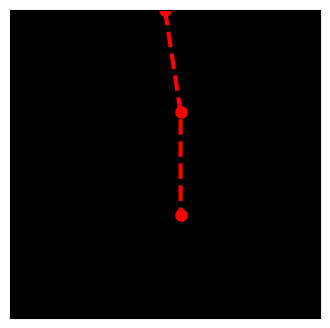

In [165]:
def animate(i):
    ln1.set_data([x0[::10][i], x1[::10][i], x2[::10][i]], [y0[::10][i], y1[::10][i], y2[::10][i]])
    trail1 = 50            # length of motion trail of weight 1 
    trail2 = 50            # length of motion trail of weight 2
    ln2.set_data(x1[::10][i:max(1,i-trail1):-1], y1[::10][i:max(1,i-trail1):-1])   # marker + line of first weight
    ln3.set_data(x2[::10][i:max(1,i-trail2):-1], y2[::10][i:max(1,i-trail2):-1])   # marker + line of the second weight
    
fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ln2, = ax.plot([], [], 'ro-',markersize = 8, alpha=0.05, color='cyan')   # line for Earth
ln3, = ax.plot([], [], 'ro-',markersize = 8,alpha=0.05, color='cyan')
ax.set_ylim(-l1l1*3,20)
ax.set_xlim(-l1l1,l1l1)
ani = animation.FuncAnimation(fig, animate, frames=2000, interval=50)
ani.save('pen1.gif',writer='pillow',fps=5000)